### Linear 을 활용한 주가 예측

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
stock_code = '000660'
url = 'https://finance.naver.com/item/sise_day.nhn?code=' + stock_code
df = pd.read_html(url, encoding='cp949', index_col=0)
stock = df[0].dropna()

In [61]:
max_page = 30
for i in range(2, max_page):
    url = 'https://finance.naver.com/item/sise_day.nhn?code='+ stock_code + '&page=' + str(i)
    df = pd.read_html(url, encoding='cp949', index_col=0)
    stock = stock.append(df[0].dropna())
stock.shape

(290, 6)

In [62]:
stock.head()

,종가,전일비,시가,고가,저가,거래량
날짜,,,,,,
2019.07.03,71300.0,100.0,71100.0,71700.0,70500.0,342265.0
2019.07.02,71400.0,1400.0,69700.0,71700.0,69100.0,2495399.0
2019.07.01,70000.0,500.0,71000.0,71000.0,69700.0,3538183.0
2019.06.28,69500.0,700.0,70900.0,70900.0,68400.0,3117569.0
2019.06.27,70200.0,1300.0,70100.0,71600.0,69700.0,5361201.0


In [63]:
stock1 = stock.iloc[::-1, 0]
stock1.head()

날짜
2018.04.25    82400.0
2018.04.26    86500.0
2018.04.27    87100.0
2018.04.30    84500.0
2018.05.02    83100.0
Name: 종가, dtype: float64

In [64]:
# 10개의 데이터를 이용하여 5일치 데이터를 예측해 보자
window_day = 10
predict_day = 5

In [65]:
print('총 데이터 개수={}, 샘플 크기={}, 총 샘플 수={}'
      .format(len(stock1), (window_day + predict_day), (len(stock1) - (window_day + predict_day) + 1)))

총 데이터 개수=290, 샘플 크기=15, 총 샘플 수=276


In [66]:
m = len(stock1) - (window_day + predict_day) + 1
m

276

In [67]:
x_list = []
y_list = []
for i in range(m):
    x = stock1.iloc[i:(i + window_day)]
    y = stock1.iloc[(i + window_day):(i + window_day + predict_day)]
    x_list.append(x)
    y_list.append(y)

In [68]:
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape # (m-instance, day, columns)

((276, 10), (276, 5))

In [69]:
X[:5]

array([[82400., 86500., 87100., 84500., 83100., 82900., 83000., 83500.,
        83400., 85800.],
       [86500., 87100., 84500., 83100., 82900., 83000., 83500., 83400.,
        85800., 86100.],
       [87100., 84500., 83100., 82900., 83000., 83500., 83400., 85800.,
        86100., 85400.],
       [84500., 83100., 82900., 83000., 83500., 83400., 85800., 86100.,
        85400., 84600.],
       [83100., 82900., 83000., 83500., 83400., 85800., 86100., 85400.,
        84600., 87000.]])

In [70]:
# train / test 분리
offset = 30
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((246, 10), (30, 10), (246, 5), (30, 5))

In [71]:
from sklearn.linear_model import Ridge
lr = Ridge()
lr.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8541571103818393, 0.0012713849060058974)

In [83]:
# 미래의 주가를 예측하여 시각화 해보자.
최근일 = stock1.iloc[-window_day:].values.reshape([1, -1])
미래일 = lr.predict(최근일)
미래일 = np.reshape(미래일, [predict_day], 1)
미래일.shape

(5,)

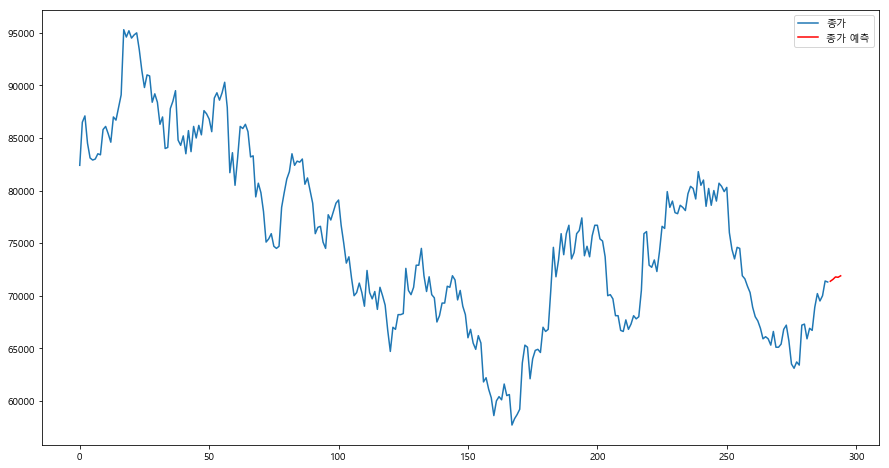

In [84]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 8))
종가 = stock1.values
x_num = np.arange(len(종가))
x1_num = np.arange(len(종가), len(종가) + len(미래일))
plt.plot(x_num, 종가, label='종가')
plt.plot(x1_num, 미래일, color='red', label='종가 예측')
plt.legend()
plt.show()